### Μέρος 2 Ζωνοπερατό φίλτρο

#### _Ζωνοπερατό φίλτρο με ζώνες διέλευσης (750 Hz, 950 Hz) και (3000 Hz, 3500 Hz)_ 
Παρακάτω πραγματοποιείται ο σχεδιασμός ζωνοπερατού φίλτρου με ζώνες διέλευσης: (750 Hz, 950 Hz) και (3000 Hz, 3500 Hz) και η εφαρμογή του στο σήμα sonar. Χρησιμοποιήθηκαν δύο διαφορετικές μέθοδοι για τον σχεδιασμό αυτού του φίλτρου: η μέθοδος αναλυτικού υπλογισμού της κρουστικης απόκρισης με εφαρμογή παραθύρου και η μέθοδος ισοϋψών κυματώσεων. Κατά τον σχεδιασμό του φίλτρου με την μέθοδο ισοϋψών κυματώσεων, χρειάστηκε να γίνει κατάλληλη χρήση της συνάρτησης signal.remez για την οποία έπρεπε να οριστούν κατάλληλα τα όρια των ζώνων διέλευσης και αποκοπής ετσι ώστε να αποφευχθεί οποιοδήποτε πιθανό φαινόμενο απότομης μεταβολής της έντασης στην ζώνη διέλευσης.

In [1]:
import warnings
import sounddevice as sd
import scipy.io.wavfile
from scipy import signal
import scipy.io.wavfile
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

#### Σήμα sonar

In [2]:
# Ανάγνωση δειγμάτων σήματος από txt file
with open('sima.txt') as f:
    s = [float(x) for x in f]
s=np.array(s)   
print('μέγεθος σήματος=', s.shape)
Fs=8192
sd.play(20*s,Fs)

μέγεθος σήματος= (6565,)


#### Ζωνοπερατό φίλτρο με ζώνες διέλευσης (750 Hz, 950 Hz) και (3000 Hz, 3500 Hz)

In [3]:
f1=750 
f2=950
f3=3000
f4=3500
Ts=1/Fs
f2m1=(f2-f1)
f2p1=(f2+f1)/2 
f4m3=(f4-f3)
f4p3=(f4+f3)/2
N=256

#### _Σχεδιασμός φίλτρου με αναλυτικό υπολογισμό της κρουστικής απόκρισης και παράθυρο_ 

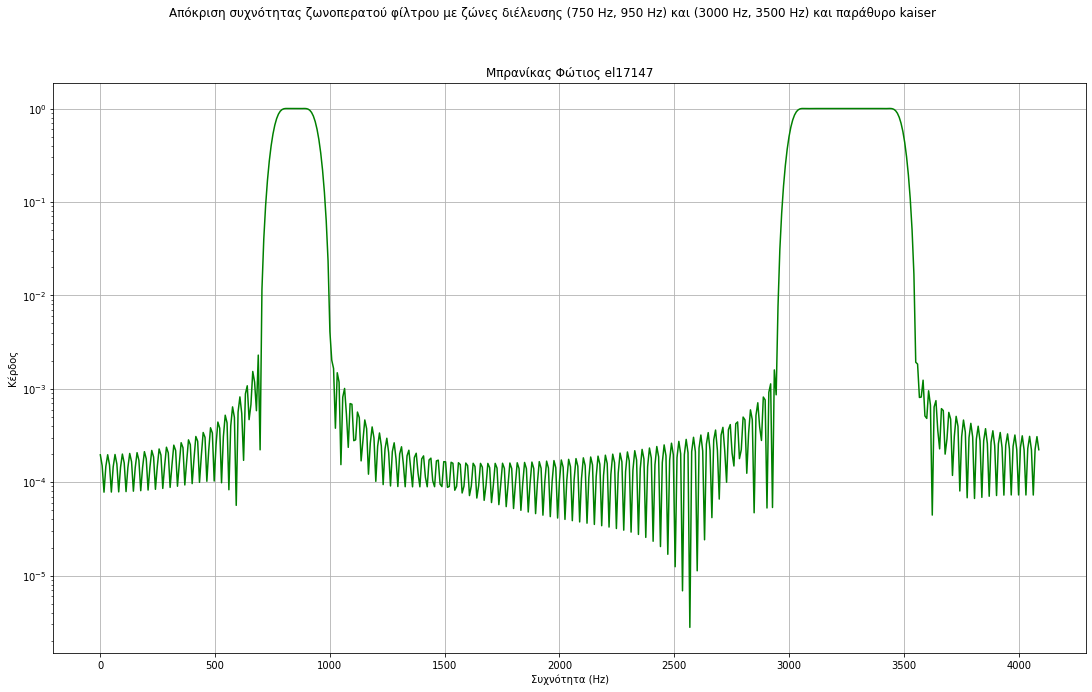

In [4]:
t=np.arange(-(N-1),N-1,2)*Ts/2;
band1=2/Fs*np.divide(np.multiply(np.cos(2*np.pi*f2p1*t),np.sin(np.pi*f2m1*t))/np.pi,t)
band2=2/Fs*np.divide(np.multiply(np.cos(2*np.pi*f4p3*t),np.sin(np.pi*f4m3*t))/np.pi,t)
hbp2=band1+band2
hbpw2=np.multiply(hbp2,signal.kaiser(len(hbp2),5));
fig = plt.figure()
plt.suptitle('Απόκριση συχνότητας ζωνοπερατού φίλτρου με ζώνες διέλευσης (750 Hz, 950 Hz) και (3000 Hz, 3500 Hz) και παράθυρο kaiser')
plt.title('Μπρανίκας Φώτιος el17147')
plt.grid()
plt.xlabel('Συχνότητα (Hz)')
plt.ylabel('Κέρδος')
fig.set_size_inches(18.5, 10.5)

freq,resp_pm = signal.freqz(hbpw2);
plt.semilogy(0.5*Fs*freq/np.pi, np.abs(resp_pm), 'g-')

plt.show()

#### _Εφαρμογή φίλτρου στο σήμα sonar_ 

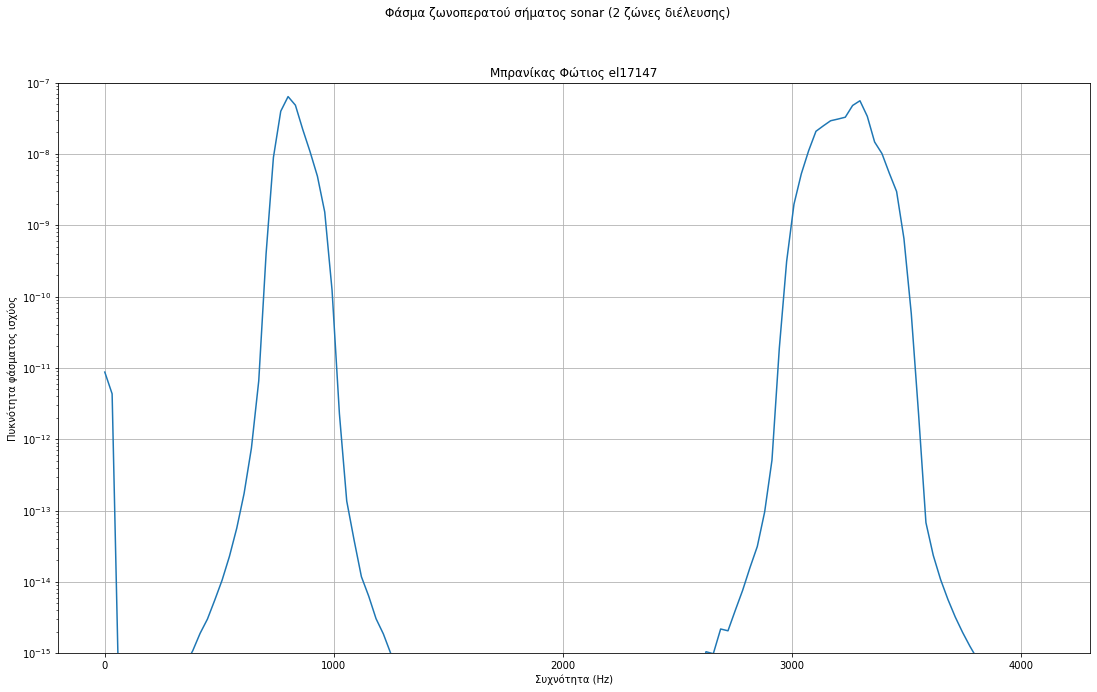

In [5]:
s_bp2=signal.convolve(s,hbpw2,'same');

f, Pxx_den = signal.welch(s_bp2, Fs, noverlap=128, nperseg=256)
fig = plt.figure()
plt.suptitle('Φάσμα ζωνοπερατού σήματος sonar (2 ζώνες διέλευσης)')
plt.title('Μπρανίκας Φώτιος el17147')
plt.grid()
plt.xlabel('Συχνότητα (Hz)')
plt.ylabel('Πυκνότητα φάσματος ισχύος')
plt.ylim((1e-15,1e-7))
fig.set_size_inches(18.5, 10.5)

plt.semilogy(f, Pxx_den)
sd.play(20*s_bp2,Fs)

#### _Σχεδιασμός Ζωνοπερατού φίλτρου ισουψών κυματώσεων με ζώνες διέλευσης (750 Hz, 950 Hz) και (3000 Hz, 3500 Hz)_ 

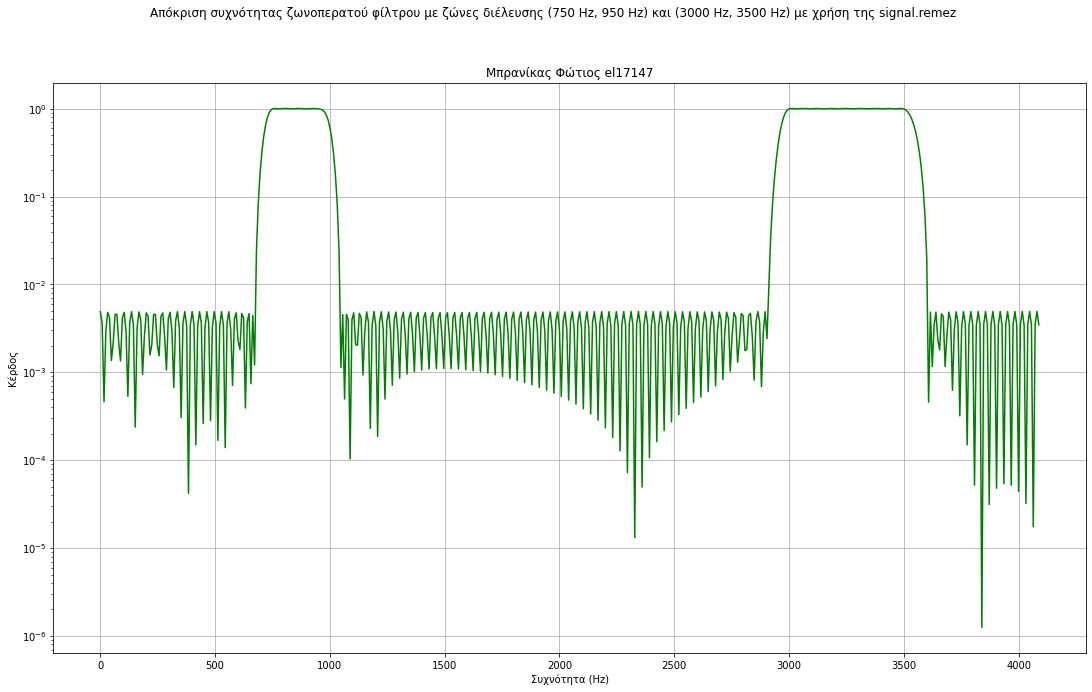

In [6]:
bpass2 = signal.remez(256, [0, f1*0.9, f1, f2, 1.1*f2, f3*0.97, f3, f4, f4*1.03, Fs/2],
                      [0, 1, 0, 1, 0], fs=Fs)

fig = plt.figure()
plt.suptitle('Απόκριση συχνότητας ζωνοπερατού φίλτρου με ζώνες διέλευσης (750 Hz, 950 Hz) και (3000 Hz, 3500 Hz) με χρήση της signal.remez')
plt.title('Μπρανίκας Φώτιος el17147')
plt.grid()
plt.xlabel('Συχνότητα (Hz)')
plt.ylabel('Κέρδος')
freq,resp_pm = signal.freqz(bpass2)
fig.set_size_inches(18.5, 10.5)

plt.semilogy(0.5*Fs*freq/np.pi, np.abs(resp_pm), 'g-')
plt.show()

#### _Εφαρμογή φίλτρου στο σήμα sonar_ 

In [7]:
s_bpass2 = signal.convolve(s,bpass2,'same')
f, Pxx_den = signal.welch(s_bpass2, Fs, noverlap=128, nperseg=256)
fig = plt.figure()
plt.suptitle('Φάσμα ζωνοπερατού σήματος sonar (2 ζώνες διέλευσης)')
plt.title('Μπρανίκας Φώτιος el17147')
plt.grid()
plt.xlabel('Συχνότητα (Hz)')
plt.ylabel('Πυκνότητα φάσματος ισχύος')
plt.ylim((1e-15,1e-7))
fig.set_size_inches(18.5, 10.5)

plt.semilogy(f, Pxx_den)
sd.play(20*s_bpass2,Fs)

for 

SyntaxError: invalid syntax (<ipython-input-7-9884b6f1db20>, line 15)